In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Pandas
## 1.Load Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/kaggle/input/titanics/titanic.txt', sep='\t', header = 0)  # header = none ข้อมูล column แรกจะกลายเป็นข้อมูลและไม่มี header 
df                                                                            # df.head() / df.tail() เอาไว้ดูข้อมูล 5 ชุดแรกและ 5 ชุดสุดท้าย
                                                                              # df =  Data Frame ชื่อตัวแปร

## 2.Access Data & Basic Functions

In [ ]:
df.columns

In [ ]:
df['Name']

In [ ]:
df.iloc[2,0:5] # ดึงข้อมูลแถวที่ 2 column ที่ 0 ถึง 4

In [ ]:
df.loc[2,'Passenger Class':'Age'] # ดึงข้อมูลแถวที่ 2 column 'Passenger Class' ถึง 'Age'

In [ ]:
df.dtypes # บอกประภทของข้อมูลแต่ละ column 
          # object คือ string

In [ ]:
df['Age'].max()

In [ ]:
df['Age'].min()

In [ ]:
df[df['Age']==df['Age'].min()] # แสดงข้อมูลทั้งหมดของคนที่ Age น้อยที่สุด

In [ ]:
df['Name'][df['Age']==df['Age'].max()] # เอา Name ของคนที่ Age เยอะที่สุด

In [ ]:
df.shape

In [ ]:
df['Sex'].tolist() # แปลงข้อมูลของ Sex เป็น list

In [ ]:
df.values

In [ ]:
df['Label'] = df['Age'] >= 20 # แสดงข้อมูลและสร้าง Column 'Label' ที่แสดงคนที่ Age >= 20 เป็น true ไม่ใช่เป็น false
df

## 3.Check Missing Values

In [ ]:
df.isnull() # แสดงข้อมูลว่าข้อมูลตัวไหนเป็น null หรือไม่
            # False คือ มีข้อมูล / True คือ ไม่มีข้อมูล

In [ ]:
df.isnull().any()

In [ ]:
df['Age'].isnull().sum() # แสดงจน.ข้อมูลของ Age ที่หายไปทั้งหมด

In [ ]:
df['Passenger Fare'].isnull().sum()

In [ ]:
df['Cabin'].isnull().sum()

## 4.Remove Values

In [ ]:
df_clean = df
df_clean = df_clean.drop('Cabin',1)             # 
df_clean = df_clean.drop('Ticket Number',1)
df_clean.columns

In [ ]:
df_clean = df_clean.dropna(1,'any') # drop ข้อมูลที่มีค่าว่างอย่างน้อย 1 ค่าตามแนว column
                                    # any คือ ทุก column 
                                    # 1 คือ column / 0 คือ row

In [ ]:
df_clean = df_clean.dropna(0,'any') 

In [ ]:
df_clean.isnull().any()

## 5.Replae values

In [ ]:
df_clean['Sex'].unique()

In [ ]:
df_clean['Sex'] = df_clean['Sex'].replace('Female','F')
df_clean['Sex'] = df_clean['Sex'].replace('Male','M')
df_clean

## 6. Replace string values to unique integers

In [ ]:
p_class, levels = pd.factorize(df_clean['Passenger Class']) # เปลี่ยนข้อมูลของ Passenger Class เป็นตัวเลข
                                                            # levels เอาไว้เทียบว่าจะให้ตัวเลขแทนอะไรบ้าง

In [ ]:
p_class

In [ ]:
levels

In [ ]:
df_clean['Passenger Class'] = p_class
df_clean

In [ ]:
df_clean.dtypes

In [ ]:
df_clean['Sex'] = pd.factorize(df_clean['Sex'])[0]
df_clean['Survived'] = pd.factorize(df_clean['Survived'])[0]
df_clean.dtypes

## 7.Set Index

In [ ]:
df_clean = df_clean.set_index('Name')
df_clean

## 8.Cross Tab Plot

In [ ]:
pd.crosstab(df_clean['Passenger Class'],df_clean['Survived']).plot(kind='bar') # 
                                                                               # 

# Ex1

In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)
df

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.1

In [55]:
df = df.set_index('hn')
df

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.2

In [56]:
df.isnull().any()

age           False
parity        False
hiv            True
menopaus       True
disease       False
surgery       False
conization     True
OPDsize        True
appearance     True
stage          True
pchemo         True
Wardsize       True
finalhisto     True
nodeyiel       True
RHlvsi         True
depth          True
size           True
utmet          True
vgmargin       True
vgmet          True
pelvicme       True
pmmet          True
adnmet         True
dtype: bool

In [57]:
df_clean = df
df_clean = df_clean.dropna(0,'any')

In [58]:
df_clean.isnull().any()

age           False
parity        False
hiv           False
menopaus      False
disease       False
surgery       False
conization    False
OPDsize       False
appearance    False
stage         False
pchemo        False
Wardsize      False
finalhisto    False
nodeyiel      False
RHlvsi        False
depth         False
size          False
utmet         False
vgmargin      False
vgmet         False
pelvicme      False
pmmet         False
adnmet        False
dtype: bool

## 1.3

In [59]:
df_clean = df_clean.drop('hiv',1)
df_clean = df_clean.drop('size',1)
df_clean = df_clean.drop('utmet',1)
df_clean = df_clean.drop('vgmet',1)
df_clean = df_clean.drop('surgery',1)
df_clean = df_clean.drop('pchemo',1)
df_clean.columns

Index(['age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

## 1.4

In [60]:
df_clean['Label'] = df['age'] >= 20
df_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet,Label
hn,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,True
2633481,32,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0,True
2633633,38,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0,True
2630496,55,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0,True
2450167,67,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0,True
3813471,42,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0,True
3812935,53,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0,True


In [61]:
df_clean['Label'].unique()

array([ True])

In [70]:
df_clean['age'] = df_clean['Label'].replace(True,'Old')
df_clean['age'] = df_clean['Label'].replace(False,'Young')

In [71]:
df_clean[df_clean['pmmet']== 0].sample(10)

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet,Label
hn,,,,,,,,,,,,,,,,,,
2741654,Old,2,0.0,0,0.0,2.0,1.0,4.0,1.5,2.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,Old
3261327,Old,3,0.0,1,0.0,3.5,2.0,4.0,3.0,1.0,21.0,999.0,3.0,0.0,1.0,0.0,0.0,Old
2290871,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,2.0,27.0,34.0,3.0,0.0,0.0,0.0,2.0,Old
2955865,Old,3,1.0,0,1.0,3.0,2.0,4.0,0.0,1.0,25.0,1.0,2.0,2.0,0.0,0.0,0.0,Old
3231988,Old,0,0.0,1,0.0,3.5,1.0,4.0,1.0,1.0,21.0,0.0,1.0,0.0,0.0,0.0,2.0,Old
3728175,Old,2,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,23.0,0.0,2.0,0.0,0.0,0.0,0.0,Old
2962142,Old,2,0.0,1,0.0,4.0,2.0,6.0,4.0,2.0,28.0,999.0,3.0,1.0,0.0,0.0,0.0,Old
2903354,Old,2,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,28.0,2.0,3.0,0.0,0.0,0.0,0.0,Old
2845536,Old,3,0.0,0,0.0,4.0,1.0,4.0,3.0,4.0,34.0,0.0,2.0,0.0,0.0,0.0,0.0,Old


In [72]:
df_clean[df_clean['pmmet']== 1].sample(10)

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet,Label
hn,,,,,,,,,,,,,,,,,,
3304085,Old,0,1.0,0,0.0,2.0,2.0,6.0,2.0,1.0,12.0,8.0,3.0,0.0,0.0,1.0,0.0,Old
3255604,Old,2,1.0,1,0.0,3.0,2.0,4.0,3.0,3.0,44.0,9.0,3.0,0.0,1.0,1.0,0.0,Old
3794642,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,23.0,999.0,3.0,0.0,1.0,1.0,0.0,Old
3561714,Old,0,0.0,0,0.0,3.0,1.0,6.0,3.0,3.0,21.0,999.0,3.0,0.0,1.0,1.0,0.0,Old
3372727,Old,2,0.0,0,0.0,6.0,1.0,5.0,6.0,3.0,35.0,999.0,3.0,0.0,1.0,1.0,0.0,Old
3270407,Old,1,0.0,1,0.0,3.0,2.0,4.0,5.0,1.0,37.0,999.0,3.0,1.0,1.0,1.0,2.0,Old
2333580,Old,2,0.0,0,0.0,2.5,2.0,4.0,3.0,1.0,34.0,999.0,3.0,2.0,1.0,1.0,0.0,Old
3376883,Old,3,0.0,0,0.0,3.0,2.0,6.0,3.0,1.0,23.0,999.0,3.0,0.0,1.0,1.0,2.0,Old
3704077,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,2.0,38.0,8.0,3.0,0.0,1.0,1.0,0.0,Old


## 1.5

In [73]:
df_clean[df_clean['pmmet']== 0]

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet,Label
hn,,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,Old
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0,Old
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0,Old
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0,Old
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810768,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0,Old
3812586,Old,2,1.0,1,0.0,3.0,1.0,4.0,3.0,1.0,32.0,7.0,3.0,0.0,0.0,0.0,0.0,Old
3807672,Old,7,0.0,1,0.0,4.0,1.0,4.0,4.0,2.0,17.0,1.0,3.0,0.0,0.0,0.0,0.0,Old


In [74]:
df_clean[df_clean['pmmet']== 1]

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet,Label
hn,,,,,,,,,,,,,,,,,,
2635600,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,18.0,10.0,3.0,0.0,1.0,1.0,2.0,Old
2634755,Old,2,0.0,0,0.0,4.0,4.0,4.0,4.0,1.0,20.0,999.0,3.0,0.0,1.0,1.0,0.0,Old
2647653,Old,1,0.0,1,0.0,6.0,1.0,5.0,6.0,1.0,14.0,5.0,3.0,0.0,1.0,1.0,0.0,Old
2648037,Old,2,0.0,0,0.0,2.0,1.0,6.0,2.0,1.0,28.0,1.0,3.0,0.0,0.0,1.0,0.0,Old
2657353,Old,5,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,26.0,10.0,3.0,2.0,0.0,1.0,0.0,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484711,Old,0,0.0,0,0.0,4.0,1.0,4.0,3.0,2.0,10.0,999.0,3.0,0.0,1.0,1.0,0.0,Old
3810771,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,23.0,10.0,3.0,0.0,0.0,1.0,0.0,Old
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0,Old


## 1.6

In [75]:
df_clean[df_clean['pmmet']== 0].sample(10)

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet,Label
hn,,,,,,,,,,,,,,,,,,
2662513,Old,2,0.0,0,1.0,0.0,5.0,1.0,0.0,1.0,20.0,2.0,3.0,0.0,0.0,0.0,0.0,Old
3628096,Old,1,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,13.0,7.0,3.0,0.0,0.0,0.0,2.0,Old
3169010,Old,1,0.0,0,1.0,0.0,5.0,4.0,2.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,2.0,Old
2821640,Old,0,0.0,0,0.0,5.0,3.0,5.0,5.0,1.0,31.0,13.0,3.0,0.0,0.0,0.0,2.0,Old
3277303,Old,2,0.0,0,0.0,1.0,1.0,4.0,2.0,1.0,24.0,999.0,3.0,0.0,1.0,0.0,2.0,Old
2733322,Old,1,0.0,0,0.0,2.0,1.0,4.0,2.0,1.0,32.0,6.0,3.0,0.0,0.0,0.0,0.0,Old
3591101,Old,2,0.0,0,0.0,0.0,5.0,4.0,0.0,2.0,38.0,1.0,3.0,0.0,0.0,0.0,1.0,Old
3135972,Old,2,1.0,1,0.0,2.0,2.0,4.0,1.5,3.0,17.0,7.0,3.0,0.0,0.0,0.0,0.0,Old
3041348,Old,1,0.0,0,0.0,3.0,2.0,4.0,3.0,2.0,22.0,17.0,2.0,0.0,1.0,0.0,0.0,Old


In [76]:
df_clean[df_clean['pmmet']== 1].sample(10)

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet,Label
hn,,,,,,,,,,,,,,,,,,
1703801,Old,2,1.0,1,0.0,2.0,2.0,4.0,2.0,1.0,29.0,999.0,3.0,0.0,0.0,1.0,0.0,Old
2815090,Old,2,0.0,0,0.0,4.5,1.0,5.0,5.0,1.0,23.0,999.0,3.0,0.0,1.0,1.0,2.0,Old
3399210,Old,4,1.0,0,0.0,2.0,2.0,4.0,3.0,1.0,19.0,999.0,3.0,0.0,1.0,1.0,0.0,Old
3308097,Old,2,1.0,1,0.0,5.0,2.0,5.0,5.0,1.0,36.0,4.0,3.0,0.0,1.0,1.0,0.0,Old
3208407,Old,2,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,55.0,999.0,3.0,0.0,0.0,1.0,0.0,Old
1130143,Old,2,0.0,0,0.0,4.0,4.0,5.0,5.0,2.0,40.0,1.0,3.0,0.0,1.0,1.0,0.0,Old
3768332,Old,2,0.0,0,0.0,5.0,2.0,6.0,4.0,1.0,37.0,999.0,3.0,0.0,0.0,1.0,0.0,Old
3467019,Old,4,0.0,1,0.0,3.0,2.0,4.0,3.0,2.0,34.0,999.0,3.0,0.0,0.0,1.0,0.0,Old
2739960,Old,2,0.0,1,0.0,3.5,1.0,4.0,3.0,1.0,18.0,999.0,3.0,0.0,0.0,1.0,2.0,Old


# Ex2

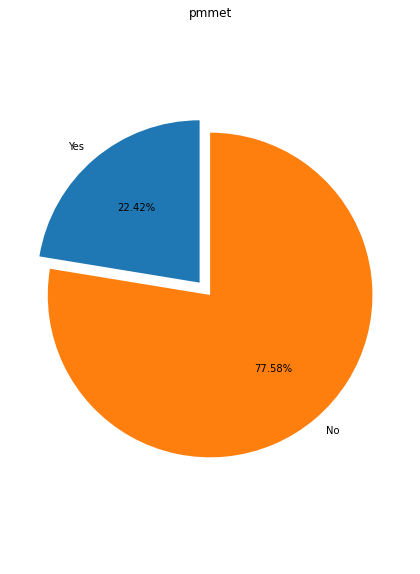

In [99]:
import matplotlib.pyplot as plt
import numpy as np
pm1 = df_clean[df_clean['pmmet']== 1].count()
pm0 = df_clean[df_clean['pmmet']== 1].count()

fig = plt.figure(1, figsize=(16,10))
labels = ['Yes' , 'No']
perc = [sum(df_clean['pmmet']== 1),
       sum(df_clean['pmmet']== 0)
       ]

explode = (0.1 , 0) 
plt.subplot(1,2,1)
plt.title('pmmet')
plt.axis('equal')           
plt.pie(perc, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode)

plt.show()

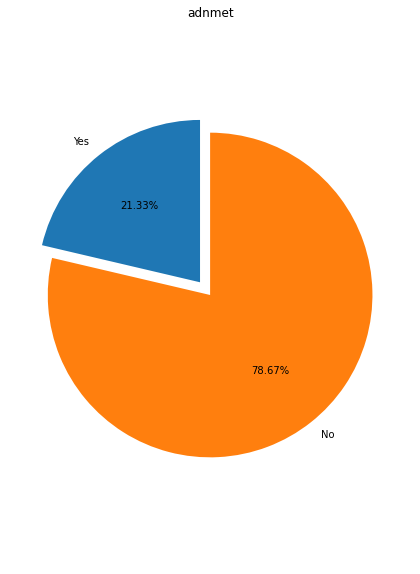

In [96]:
fig = plt.figure(1, figsize=(16,10))
labels = ['Yes' , 'No']
perc = [sum(df_clean['adnmet']== 2),
       sum(df_clean['adnmet']== 0)
       ]

explode = (0.1 , 0) 
plt.subplot(1,2,1)
plt.title('adnmet')
plt.axis('equal')           
plt.pie(perc, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode)

plt.show()

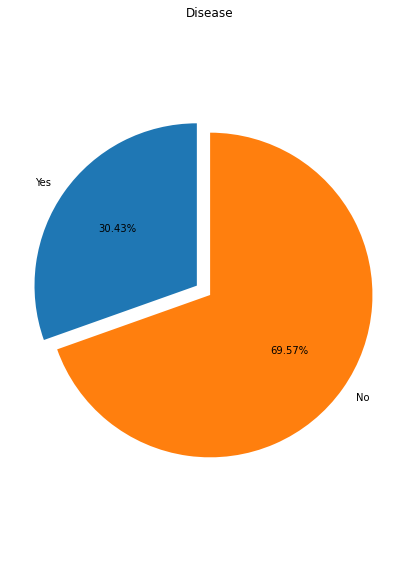

In [97]:
fig = plt.figure(1, figsize=(16,10))
labels = ['Yes' , 'No']
perc = [sum(df_clean['disease'] == 1),
       sum(df_clean['disease'] == 0)
       ]

explode = (0.1 , 0) 
plt.subplot(1,2,1)
plt.title('Disease')
plt.axis('equal')           
plt.pie(perc, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode)

plt.show()

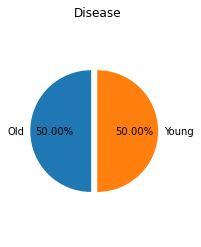

In [103]:
o = df_clean[df_clean['age']== 'Old'].count()
y = df_clean[df_clean['age']== 'Young'].count()

labels = ['Old' , 'Young']
perc = [(df_clean['age'] == 'Old').count(),
       (df_clean['age'] == 'Young').count()
       ]

explode = (0.1 , 0) 
plt.subplot(1,2,1)
plt.title('Disease')
plt.axis('equal')           
plt.pie(perc, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode)

plt.show()

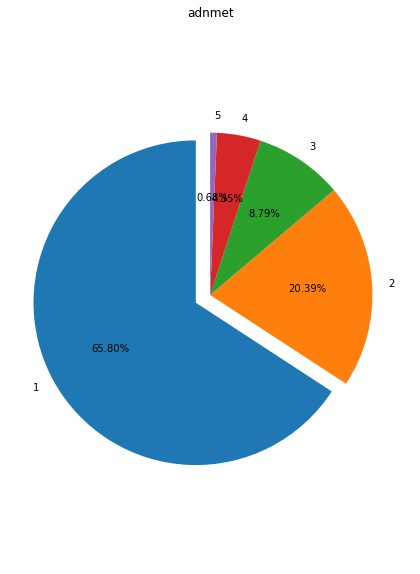

In [112]:
fig = plt.figure(1, figsize=(16,10))
labels = ['1' , '2', '3', '4', '5']
perc = [sum(df_clean['finalhisto']== 1),
       sum(df_clean['finalhisto']== 2),
        sum(df_clean['finalhisto']== 3),
        sum(df_clean['finalhisto']== 4),
        sum(df_clean['finalhisto']== 5)
       ]

explode = (0.1 , 0 , 0 , 0 , 0)
plt.subplot(1,2,1)
plt.title('adnmet')
plt.axis('equal')           
plt.pie(perc, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode)

plt.show()